In this example we are going to construct boundary conditions for a mesh based on nested meshes (on next figure the small mesh is delimitated by black points). This small mesh domain is inside a bigger domain and we construct the boundary spectrum conditions from the sea state result made on the bigger domain. by the command pretel/spectrum.py 

(5674000.0, 5696000.0)

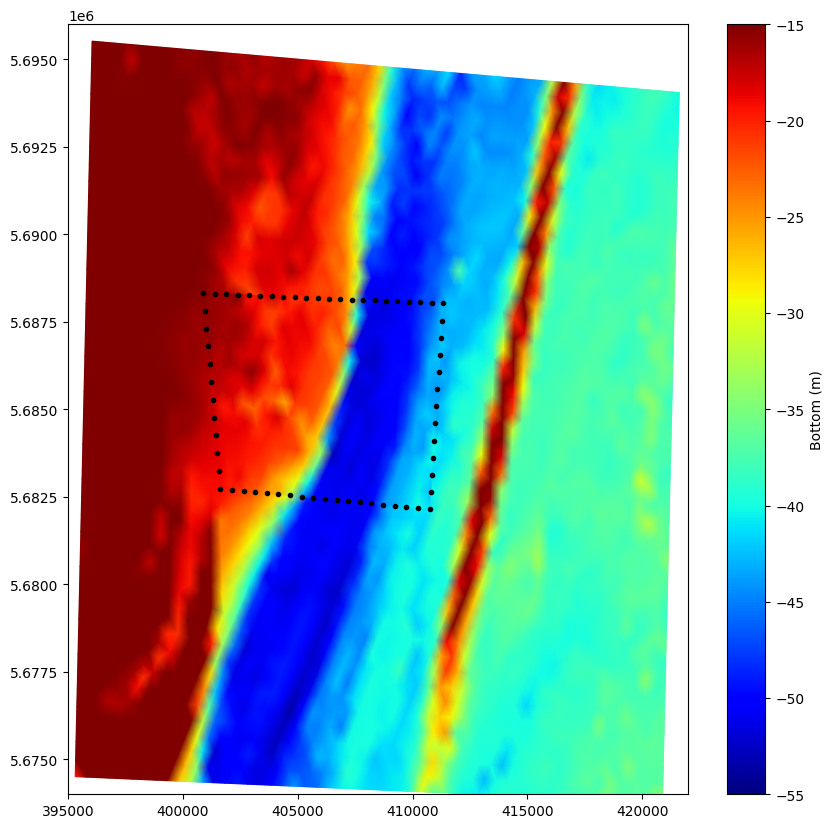

In [1]:
from data_manip.extraction.telemac_file import TelemacFile
import matplotlib.pyplot as plt
from postel.plot2d import *

HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/notebooks/data/TestSpectrum
smallmeshfile='smallmesh.med'
bigmeshfile='bigmesh.med'
smallmesh = TelemacFile(smallmeshfile,bnd_file='bc_small.bnd')
small_bottom = smallmesh.get_data_value('BOTTOM', 0)
bigmesh = TelemacFile(bigmeshfile)
big_bottom = bigmesh.get_data_value('BOTTOM', 0)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot mesh
plot2d_triangle_mesh(ax, bigmesh.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_map(fig, ax, bigmesh.tri, big_bottom, data_name='Bottom (m)', vmin=-55, vmax=-15)
plot2d_scalar_map(fig, ax, smallmesh.tri, small_bottom, data_name='Bottom (m)', colorbar=False, vmin=-55, vmax=-15)
nbor,_,_,_,_ = smallmesh.get_bnd_info()
for iptfr in nbor:
    ax.plot(smallmesh.meshx[iptfr],smallmesh.meshy[iptfr],'k.')
    
ax.set_xlim(395000,422000)
ax.set_ylim(5674000,5696000)

Firstly we make the result on the bigger mesh by the command:

In [2]:
!tomawac.py tom_big.cas > listing_big.log

Then we construct the spectrum on the boundary of the small mesh in the file given by the keyword
IMPOSED SPECTRA FILE, if no file is specified it will be saved in spectrum.spe. The sea state variables are given in the file tom_big.slf.

In [3]:
!../../../scripts/python3/pretel/spectrum.py tom_small.cas --res tom_big.slf

  ~> Checking keyword/rubrique coherence
bnd_file bc_small.bnd


The spectrum has been saved in ./spectrum.spe


We can now run the simulation on the small domain, with the spectrum as boundary condition.

In [4]:
!tomawac.py tom_small.cas > listing_small.log


We can now check that the results on the small domain are similar to results obtained on the big domain.

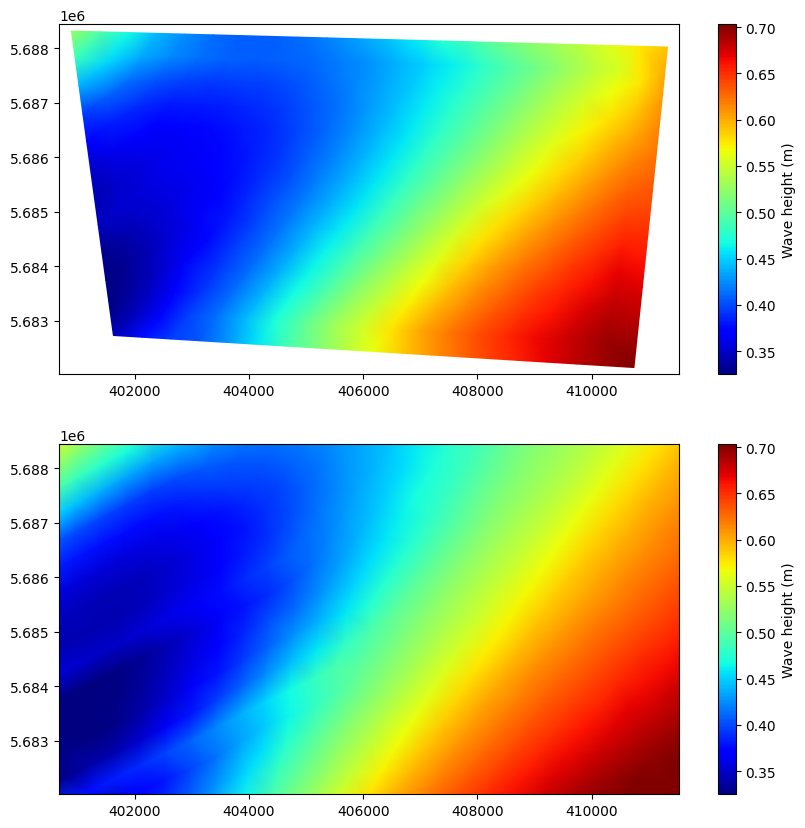

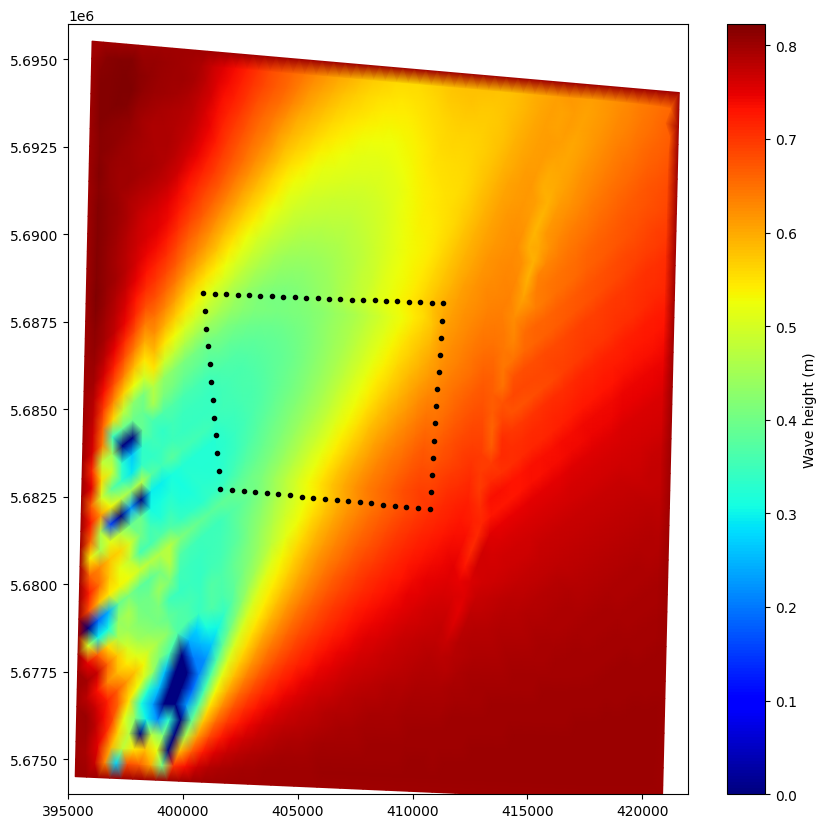

In [5]:
big_res_file='tom_big.slf'
big_res = TelemacFile(big_res_file)
big_wave_height=big_res.get_data_value("WAVE HEIGHT HM0",-1)
small_res_file='tom_small.slf'
small_res=TelemacFile(small_res_file)
small_wave_height=small_res.get_data_value("WAVE HEIGHT HM0",-1)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plot2d_scalar_map(fig, ax[0], smallmesh.tri, small_wave_height, data_name='Wave height (m)',\
                 vmin=min(small_wave_height),vmax=max(small_wave_height))
xlim=ax[0].get_xlim()
ylim=ax[0].get_ylim()
plot2d_scalar_map(fig, ax[1], bigmesh.tri, big_wave_height, data_name='Wave height (m)',\
                 vmin=min(small_wave_height),vmax=max(small_wave_height))
ax[1].set_xlim(xlim)
ax[1].set_ylim(ylim)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot2d_scalar_map(fig, ax, bigmesh.tri, big_wave_height, data_name='Wave height (m)',\
                 vmin=min(big_wave_height),vmax=max(big_wave_height))

plot2d_scalar_map(fig, ax, smallmesh.tri, small_wave_height, data_name='Wave height (m)',\
                 vmin=min(big_wave_height),vmax=max(big_wave_height),colorbar=False)
ax.set_xlim(395000,422000)
ax.set_ylim(5674000,5696000)
for iptfr in nbor:
    ax.plot(smallmesh.meshx[iptfr],smallmesh.meshy[iptfr],'k.')
